<a href="https://colab.research.google.com/github/kunalkishanmehta/ns-struc-dm/blob/master/Two_fluid_code_clean_hqc18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np # import packages
import matplotlib.pyplot as plt
import scipy.interpolate
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [ ]:
# download and install the code

%%bash
# make this cell an instance of a terminal

git clone https://github.com/kunalkishanmehta/ns-struc-dm.git # download code repository from https://github.com/landryp/ns-struc/tree/enthalpy
python2 -m pip install scipy

mkdir /opt/bin /opt/lib/ /opt/lib/python2.7 /opt/lib/python2.7/site-packages # create install directory and make it findable
export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

cd /content/ns-struc-dm # install code
python2 setup.py install --prefix /opt/

echo -e '\n *** \n'

getnsprops -h # this is the executable from ns-struc that solves the TOV equations to compute neutron star observables; print its help string to see the syntax for calling it

echo -e '\n *** \n'

running install
running bdist_egg
running egg_info
writing ns_struc_dm.egg-info/PKG-INFO
writing top-level names to ns_struc_dm.egg-info/top_level.txt
writing dependency_links to ns_struc_dm.egg-info/dependency_links.txt
reading manifest file 'ns_struc_dm.egg-info/SOURCES.txt'
writing manifest file 'ns_struc_dm.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/struceqs.py -> build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/__init__.py -> build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/macro.py -> build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/branch.py -> build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/pltsetup.py -> build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.

fatal: destination path 'ns-struc-dm' already exists and is not an empty directory.
mkdir: cannot create directory ‘/opt/bin’: File exists
mkdir: cannot create directory ‘/opt/lib/’: File exists
mkdir: cannot create directory ‘/opt/lib/python2.7’: File exists
mkdir: cannot create directory ‘/opt/lib/python2.7/site-packages’: File exists
zip_safe flag not set; analyzing archive contents...


In [ ]:
%%bash
export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

cd /content/ns-struc-dm # install code
git pull
python2 setup.py install --prefix /opt/



Already up to date.
running install
running bdist_egg
running egg_info
writing ns_struc_dm.egg-info/PKG-INFO
writing top-level names to ns_struc_dm.egg-info/top_level.txt
writing dependency_links to ns_struc_dm.egg-info/dependency_links.txt
reading manifest file 'ns_struc_dm.egg-info/SOURCES.txt'
writing manifest file 'ns_struc_dm.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/struceqs.py -> build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/__init__.py -> build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/macro.py -> build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/branch.py -> build/bdist.linux-x86_64/egg/nsstruc
copying build/lib.linux-x86_64-2.7/nsstruc/pltsetup.py -> build/bdist.linux-x86_64/egg/nsstru

zip_safe flag not set; analyzing archive contents...


In [ ]:
# calculate neutron star observables for a given equation of state

%%bash
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -r 0.,12. -n 48 -R 0.,12. # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Process is interrupted.


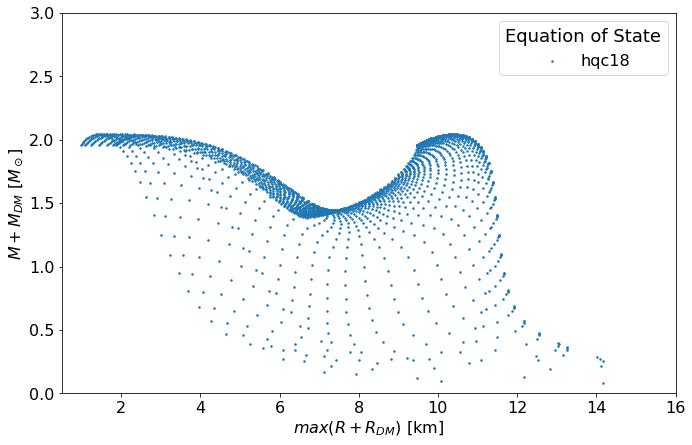

In [ ]:
# load the table of neutron star observablesthat was created above
mrl_data_hqc18 = np.genfromtxt('/content/macro-hqc18.csv',delimiter=',',names=True,dtype=None)


plt.figure(figsize= (11,7))

plt.scatter(mrl_data_hqc18['R'],(mrl_data_hqc18['Mg']), label = 'hqc18', marker = 'p', s =3)


plt.xlim(0.5,16.)
plt.ylim(0.,3.)
plt.xlabel(r'$max(R+R_{DM})$ [km]', size = 16) # add plot labels, etc.
plt.ylabel(r'$M+M_{DM}$ [$M_\odot$]', size = 16)
plt.legend(fontsize = 16, title='Equation of State',title_fontsize=18 , loc = 'upper right')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [ ]:
def filter_R(data,model,n):

  lim = np.argmax((data['M']+data['Mdm']))
  # plt.scatter(np.maximum(data['R'][:lim+10],data[:lim+10]['Rdm']),((data['M']+data['Mdm'])[:lim+10]), label = '{}'.format(model), marker = 'p')
  
  for i in range(len(data)):
    if data['R'][i] < data['Rdm'][i]:
      plt.scatter(data['R'][i],(data['M']+data['Mdm'])[i], marker = '.', color = 'lawngreen', s =3)
    elif data['R'][i] > data['Rdm'][i]:
      plt.scatter(data['R'][i],(data['M']+data['Mdm'])[i], marker = '.', color = 'm', s=3)
    else:
      plt.scatter(data['R'][i],(data['M']+data['Mdm'])[i], marker = 'o', color = 'b', s=3)

  # plt.plot(data['R'][0::n],(data['M']+data['Mdm'])[0::n], label = '{} R0'.format(model), color = 'k')
  plt.scatter(data['R'][0::n],(data['M']+data['Mdm'])[0::n], label = '{} R0'.format(model), color = 'k', s = 10)

  return

In [ ]:
def filter_fdm(data,model,n):

  # lim = np.argmax((data['M']+data['Mdm']))
  # plt.scatter(np.maximum(data['R'][:lim+10],data[:lim+10]['Rdm']),((data['M']+data['Mdm'])[:lim+10]), label = '{}'.format(model), marker = 'p')
  
  for i in range(len(data)):
    if data['fdm'][i] < 0.5:
      plt.scatter(data['R'][i],(data['Mg'])[i], marker = '.', color = 'm', s = 3)
    elif data['fdm'][i] > 0.5:
      plt.scatter(data['R'][i],(data['Mg'])[i], marker = '.', color = 'c', s = 3)
    else:
      plt.scatter(data['R'][i],(data['Mg'])[i], marker = '.', color = 'gray', s = 3)

  plt.scatter(data['R'][0::n],(data['Mg'])[0::n], label = '{} R0'.format(model), marker = 'o', color = 'k', s = 10)

  return

In [ ]:
def plots(data,i,n,R,model):
  
  plt.scatter(data['R'][i::n],(data['Mg'][i::n]), label = '{} R={}'.format(model,R))


  plt.xlim(8.,16.)
  plt.ylim(1.,3.)
  plt.xlabel(r'$max(R+R_{DM})$ [km]', size = 16) # add plot labels, etc.
  plt.ylabel(r'$M+M_{DM}$ [$M_\odot$]', size = 16)
  plt.legend(fontsize = 16, title='Equation of State',title_fontsize=18 )
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  return

In [ ]:
# load central density, radius and mass data (computed separately)

dat = np.genfromtxt('macro-hqc18.csv',delimiter=',',dtype=None,names=True)

In [ ]:
# to associate the dark matter fraction to each point in rhoc-rhocdm space, interpolate 3D (rhoc,rhocdm,fdm) data to get a function fdm(rhoc,rhocdm)

x = dat['rhoc'] # input data
y = dat['rhocdm']
z = dat['fdm']

X = np.linspace(0.1e14,3.1e15,1000) # the grid where we'll evaluate fdm(rhoc,rhocdm)
Y = np.linspace(0.1e14,3.1e15,1000)
x_grid, y_grid = np.meshgrid(X, Y)

outdat = scipy.interpolate.griddata((x,y),z,(x_grid,y_grid),'linear')
 # fdm evaluated on the grid, with one of three methods: nearest, linear, cubic

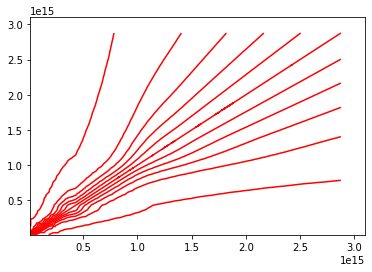

In [ ]:
# plot the interpolated fdm function 


num_cs = 9
cs = plt.contour(x_grid,y_grid,outdat,list(np.geomspace(1e-2,0.1,2))+list(np.linspace(0.1,0.9,num_cs)[1:])+list(reversed(1.-np.geomspace(1e-2,0.1,2)[:-1])),colors='r') # plot the contours of constant fdm(rhoc,rhocdm)



In [ ]:
# extract the (rhoc,rhocdm) coordinates of the constant-fdm contours

contours = []
for i in range(num_cs+3):
  try: c = cs.allsegs[i][0] # if a contour was plotted, save it
  except: continue
  contours += [c] # list that stores all the extracted contours




In [ ]:
# downsample the contours to get a list of (rhoc,rhocdm) coordinates to use to generate a constant-fdm sequence of stars

num_stars = 100 # how many stars to aim for in the sequence
rhocs, rhocdms = [], []

for c in contours:
  
  skip = int(len(c[:,0])/num_stars)
  rhocs += [c[::skip,0]]
  rhocdms += [c[::skip,1]] # downselect to num_stars (rhoc,rhocdm) points


rhomin = 2.8e14 # because some central densities are too small to give physical neutron stars, throw out those below rhomin
rhomax = 12*rhomin # because some central densities are too large to give physical neutron stars, throw out those above rhomax
rhocs_out, rhocdms_out = [], []

for c,cdm in zip(rhocs,rhocdms):
  c_out, cdm_out = [], []

  for rhoc,rhocdm in zip(c,cdm):
    
    if (rhoc >= rhomin or rhocdm >= rhomin) and rhoc <= rhomax and rhocdm <=rhomax: # one of rhoc/rhocdm below rhomin is ok, to allow pure regular matter or pure dm star
      c_out += [rhoc]
      cdm_out += [rhocdm]
  rhocs_out += [c_out]
  rhocdms_out += [cdm_out]

In [ ]:
def find_rhos(n):
  newrhoc = [str(r) for r in rhocs_out[n]]
  find_rhos.newrhocs_list = ','.join(newrhoc)

  newrhocdm = [str(r) for r in rhocdms_out[n]]
  find_rhos.newrhocdms_list = ','.join(newrhocdm)
  return find_rhos.newrhocs_list, find_rhos.newrhocdms_list


In [ ]:
find_rhos(0)

('294564564564564.56,316269912493909.7,340960960960961.0,368798798798798.9,396636636636636.7,420726915751538.1,443033033033033.06,470870870870870.8,495615615615615.6,520360360360360.4,548198198198198.25,572942942942943.0,595358308086566.5,619339339339339.4,647177177177177.2,675015015015015.0,697188781918778.6,724504504504504.5,749249249249249.2,773993993993994.0,797036544871569.8,825789490540060.5,851321321321321.5,872972972972973.0,897639246238250.2,922462462462462.5,947207207207207.2,968858858858858.8,992288143878832.8,1017065444749726.5,1036906906906907.0,1058558558558558.8,1080210210210210.2,1095712672641186.4,1114234234234234.2,1132792792792793.0,1154444444444444.5,1179189189189189.2,1207027027027027.0,1231771771771771.8,1256516516516516.5,1284354354354354.5,1312192192192192.2,1336936936936937.0,1364774774774774.5,1392612612612612.8,1417357357357357.5,1445195195195195.2,1473033033033033.0,1500870870870871.0,1525615615615615.8,1553453453453453.5,1580161621048468.0,1608756926790075.

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour0 -r $1 -n 10 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.94564564565e+14 g/cm^3
Done at central density 2.8772972973e+15 g/cm^3
Save to /content/macro_contour0hqc18.csv


In [ ]:
find_rhos(1)

('291471471471471.5,319309309309309.3,350779264919262.2,374984984984985.0,409009009009009.0,436846846846846.9,461591591591591.6,489429429429429.44,520360360360360.4,542012012012012.06,564809860858610.4,588408408408408.5,610060060060060.1,634627515080329.5,649233094736248.4,662642642642642.6,680336842994202.4,705945945945946.0,727597597597597.6,748787027223434.1,773993993993994.0,795531135869985.6,817297297297297.4,839952168942915.6,863693693693693.8,888438438438438.5,906996996996997.0,930361520978041.5,956486486486486.5,975045045045045.1,997795694225805.9,1022100500294321.0,1046669926823867.5,1072148415816484.6,1098768768768768.9,1123513513513513.6,1151793990885227.0,1179228926354955.2,1207027027027027.0,1237957957957958.0,1268888888888889.0,1296726726726726.8,1324564564564564.8,1355495495495495.5,1383333333333333.5,1414264264264264.2,1445195195195195.2,1476126126126126.2,1507057057057057.5,1534894894894895.0,1565825825825825.8,1595336177044092.5,1626033716549443.2,1658618618618618.8,1

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour1 -r $1 -n 10 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.91471471471e+14 g/cm^3
Done at central density 2.85564564565e+15 g/cm^3
Save to /content/macro_contour1hqc18.csv


In [ ]:
find_rhos(2)

('297657657657657.7,328588588588588.6,356426426426426.44,390450450450450.5,430642888472467.7,458185964257354.75,484072667459983.0,507987987987988.0,531449338309593.0,548198198198198.25,565486633371753.9,586266557891295.6,611909736735467.2,637809539589941.6,664452620744449.5,687387387387387.4,713363879303227.5,739969969969970.0,767807807807807.9,789347231945728.5,813414210691563.5,837431283692936.8,861556391587542.9,885949946678676.9,910651534064204.5,937927927927928.0,964651478090725.2,987417417417417.5,1015255255255255.2,1043093093093093.0,1070930930930931.0,1099068779576750.2,1132792792792793.0,1163020843191070.5,1194654654654654.8,1225585585585585.8,1259609609609609.8,1290540540540540.5,1324564564564564.8,1358349007675656.2,1389519519519519.5,1421612979455751.5,1454474474474474.5,1485405405405405.5,1516336336336336.5,1547267267267267.2,1578198198198198.0,1611961591508233.5,1640652648986927.2,1670990990990991.0,1701921921921922.0,1732852852852853.0,1761571527527413.8,1791621621621621

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour2 -r $1 -n 10 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.97657657658e+14 g/cm^3
Done at central density 2.87473710196e+15 g/cm^3
Save to /content/macro_contour2hqc18.csv


In [ ]:
find_rhos(3)

('293878081502900.5,321554105070231.8,353333333333333.4,387597049461308.5,424474474474474.5,454301060304651.8,477057057057057.06,493894315966417.9,510362879859749.2,535825825825825.9,560570570570570.6,585315315315315.4,612504074881444.9,640238158741966.2,665401487598615.5,690480480480480.5,718023461089626.4,743063063063063.2,768174517648298.1,794648258452727.8,823100517243619.8,845135135135135.1,870019559169568.1,896611970715922.4,922462462462462.5,950566018596307.8,975236843660882.0,1002956851932756.9,1032453111521127.5,1061651651651651.8,1092582582582582.6,1123513513513513.5,1154444444444444.5,1185598554512112.2,1218803200973618.2,1250330330330330.5,1281970033492514.0,1315285285285285.2,1346216216216216.2,1377147147147147.2,1408078078078078.2,1439009009009009.0,1466846846846847.0,1497633803997242.8,1525615615615616.0,1553453453453453.5,1582686455291124.2,1611090699048238.8,1639821281365144.8,1667897897897898.0,1695735735735735.8,1723573573573573.8,1751411411411411.5,1780023173559482.

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour3 -r $1 -n 10 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.93878081503e+14 g/cm^3
Done at central density 2.87612651271e+15 g/cm^3
Save to /content/macro_contour3hqc18.csv


In [ ]:
find_rhos(4)

('291128231607806.5,319309309309309.3,350240240240240.25,381171171171171.1,418288288288288.25,445351249959826.2,460948522310856.25,482515397098682.1,511081081081081.1,535825825825825.9,562417245997933.9,589377864912380.8,616246246246246.2,644084084084084.1,671137538513242.1,699759759759759.9,724504504504504.5,752003107758347.0,777676766307862.1,804924924924925.0,831640187989893.5,857507507507507.5,885345345345345.4,912210718668744.6,939233549943939.2,966892723399221.5,996064849825888.8,1024534534534534.6,1054537437973388.9,1083303303303303.2,1114234234234234.2,1145165165165165.2,1173126639888659.5,1203933933933934.0,1234864864864865.0,1265795795795795.8,1296068133865820.8,1324564564564564.8,1353855896949282.0,1383333333333333.5,1411171171171171.2,1439009009009009.0,1466823361542979.2,1494263119714670.2,1521876564651616.0,1549896108153791.5,1578198198198198.2,1606036036036036.0,1633873873873874.0,1662005551673222.5,1691203383329442.5,1719774349171107.5,1748318318318318.5,177615615615615

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour4 -r $1 -n 10 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.91128231608e+14 g/cm^3
Done at central density 2.85564564565e+15 g/cm^3
Save to /content/macro_contour4hqc18.csv


In [ ]:
find_rhos(5)

('291471473108806.06,313123124086695.3,334774778732211.1,356426427941779.2,378078095322345.5,399729776315979.7,421381393049456.9,458498498498498.5,498708708708708.75,542012012012012.06,566757025573362.9,588408818191139.8,610060099481658.5,653363363363363.4,696666666666666.8,736876876876876.9,758528528528528.6,780180180180180.2,804924924924925.0,835855855855855.9,863693693842875.6,885345345994460.9,906996997261761.2,937927927927928.0,978138138138138.2,999789789789789.9,1021441441441441.5,1043093093131369.1,1064744745165352.5,1086396396674692.0,1114234234234234.2,1148258258258258.2,1191561561561561.8,1231771771771771.8,1262702702702702.8,1296726726726726.8,1324564564564564.5,1352402402402402.5,1374054054054054.2,1395705705705705.8,1417357357237029.8,1439009008602885.0,1460660660542529.5,1494684684684684.8,1537987987987988.0,1562732732732732.8,1593663663663663.8,1636966966966967.0,1680270270270270.2,1720480480480480.5,1748318318318318.5,1782342342342342.5,1807087087087087.0,18349249249249

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour5 -r $1 -n 10 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.91471473109e+14 g/cm^3
Done at central density 2.86183183183e+15 g/cm^3
Save to /content/macro_contour5hqc18.csv


In [ ]:
find_rhos(6)

('266726726726726.75,289761611424684.9,310158633947657.1,333363292396779.4,349368517780199.1,374984984984985.0,411544173656920.1,443033033033033.1,467085612651161.75,494700887413359.2,520360360360360.4,545105105105105.1,571124250701048.9,596734023642079.4,622432432432432.5,646657473077443.5,672817919505049.8,698316941965155.0,724504504504504.5,750289599483221.0,776354522348145.0,802374749123206.8,826576576576576.6,854414414414414.5,879159159159159.2,903903903903904.0,928648648648648.8,952331404256052.5,975045045045045.1,997979288269021.2,1020888159118766.5,1042827737562181.0,1064744744744744.8,1086396396396396.5,1108726505369591.0,1131858363471663.0,1154444444444444.5,1176598635985202.5,1200840840840841.0,1224770607381653.5,1249880866376968.2,1274384522263824.8,1299819819819820.0,1324442396517587.8,1349309309309309.5,1374054054054054.0,1398602031167174.8,1422609202699663.2,1446305482772508.2,1469939939939940.0,1494684684684684.8,1519429429429429.5,1543560247520400.8,1567648393744531.0,

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour6 -r $1 -n 10 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.66726726727e+14 g/cm^3
Done at central density 2.48732568751e+15 g/cm^3
Save to /content/macro_contour6hqc18.csv


In [ ]:
find_rhos(7)

('245075075075075.1,266726726726726.75,284355880364985.44,297289310745132.3,310180165956808.4,334774774774774.8,359519519519519.56,390450450450450.5,424474474474474.5,447760345749667.25,471156991264387.75,496004320375203.4,520360360360360.3,542012012012012.1,566756756756756.8,587239189582490.5,613153153153153.1,634843211720198.8,659090649201655.6,684294294294294.4,705945945945945.9,731213343567377.2,755435435435435.5,780180180180180.2,804041933121362.8,826576576576576.6,848855866510489.8,869879879879879.9,891531531531531.6,910090090090090.1,930529161228652.4,948245787606260.8,967109383215329.8,984504476325008.6,1002882882882882.8,1018585620576443.5,1036906906906907.0,1055376610476554.8,1073053814685574.8,1090371221385749.8,1110426845916250.2,1129699699699699.8,1149607691633860.2,1169909909909910.0,1190679125920884.8,1210120120120120.2,1231771771771771.8,1253254555855858.0,1274691188970638.0,1295816263232999.5,1316638440679698.0,1338568398967109.0,1359234452249736.0,1380240240240240.2,1

In [ ]:

# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour7 -r $1 -n 10 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.45075075075e+14 g/cm^3
Done at central density 2.16588588589e+15 g/cm^3
Save to /content/macro_contour7hqc18.csv


In [ ]:
find_rhos(8)

('218393039415848.12,238888888888888.9,254539258502236.47,264443414821357.97,276006006006006.0,294564564564564.56,314043616195972.0,333067687711687.75,357127140832585.0,388196449784521.4,418288288288288.3,440150739789201.7,464684684684684.7,484836773042108.25,504894894894894.94,524400373467481.25,548198198198198.25,569849849849849.9,591501501501501.5,613045852551228.4,634804804804804.9,656456456456456.5,678108108108108.1,699759759759759.8,721411411411411.5,742134764587190.8,761621621621621.8,783643402869503.4,802250917558687.4,822577743043883.4,839958135564337.2,857507507507507.5,872972972972973.0,888438438438438.5,901529610291552.1,918081858784246.6,931741741741741.8,944114114114114.1,957079411451737.4,971951951951952.0,986320239927643.5,1000453711971892.8,1015255255255255.4,1028255986428875.8,1043753336981292.5,1059475178850747.0,1074228452571454.8,1089489489489489.5,1104954954954955.0,1121784495453000.8,1138077735828336.5,1153687375150818.0,1169909909909910.0,1186971763811940.5,1203

In [ ]:

# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour8 -r $1 -n 10 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.18393039416e+14 g/cm^3
Done at central density 1.81945945946e+15 g/cm^3
Save to /content/macro_contour8hqc18.csv


In [ ]:
find_rhos(9)

('178311057852114.47,195287301642011.44,205665602997935.44,215995315618721.75,226155743118417.5,232702702702702.7,249665435008516.97,262930437325937.5,278433615777229.84,293735795574922.25,306936936936936.94,325344174261253.75,342232824080114.7,359519519519519.56,384264264264264.3,412069730856747.9,434100904243089.7,452312312312312.3,467887357503085.7,485271355205692.56,502678704235283.0,520360360360360.4,535536845670784.7,554384384384384.44,572666869859356.8,587423841399869.1,608848589092905.9,625525525525525.5,640750966225088.5,660942458299042.8,678043660832890.4,690480480480480.5,709039039039039.0,724504504504504.5,739220263457714.9,752388077525457.8,764714714714714.8,777087087087087.1,789930404185820.6,801831831831831.9,811855860956077.6,822937758784119.2,833799059337999.9,843177538122573.0,854687666233877.9,865035362951510.4,873502459618348.4,885345345345345.2,895689034652839.8,904920785582330.5,915797435563115.4,925555555555555.6,933674819635821.0,944114114114114.1,95406120062941

In [ ]:

# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour9 -r $1 -n 10 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 1.78311057852e+14 g/cm^3
Done at central density 1.39570570571e+15 g/cm^3
Save to /content/macro_contour9hqc18.csv


In [ ]:
find_rhos(10)

('60847400274550.56,72607273516526.17,77445925144478.22,88448658262578.84,100518507166798.56,109379439625365.3,118258258258258.27,126622080884806.38,133456927615370.9,137725332108853.03,146096096096096.12,155375375375375.38,164654654654654.66,179265296112961.94,186351218036371.94,191763478425260.06,203498855279705.06,211852654352326.5,217960528890376.62,226516516516516.5,238888888888888.9,248168168168168.2,254354354354354.38,266533243159438.2,277078457222889.7,285791199882255.2,295569104243327.06,306619341796693.75,318777938787486.06,331378571702160.0,341998827744831.44,352145028214997.4,363831240216099.75,380815211358747.7,396636636636636.7,412102102102102.1,428554533219470.75,436846846846846.9,443285036291119.9,452312312312312.3,461591591591591.6,469367188849198.0,477057057057057.06,485203526116664.4,492522522522522.56,498935657816462.56,505344136680088.94,513555543861014.0,519650797397184.5,525057051273616.75,532732732732732.75,539696194945271.4,548001883803249.1,554384384384384.44,

In [ ]:

# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour10 -r $1 -n 10 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 6.08474002746e+13 g/cm^3
Done at central density 7.81880089554e+14 g/cm^3
Save to /content/macro_contour10hqc18.csv


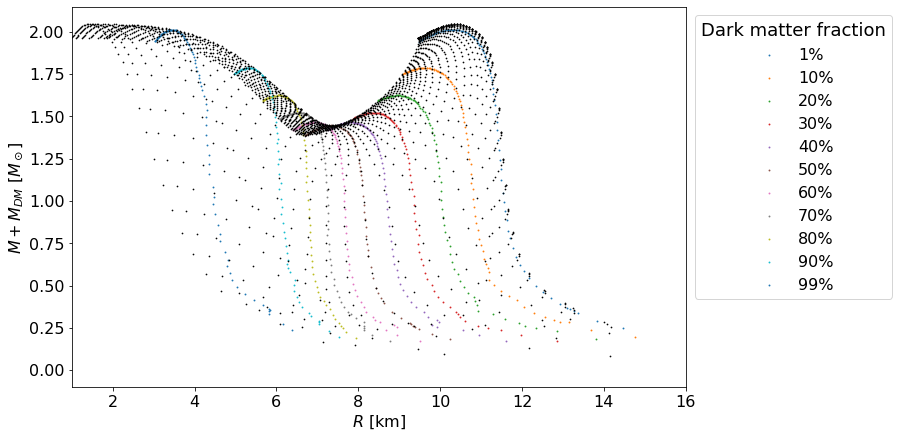

In [ ]:
data_con0 = np.genfromtxt('/content/macro_contour0hqc18.csv',delimiter=',',names=True,dtype=None)
data_con1 = np.genfromtxt('/content/macro_contour1hqc18.csv',delimiter=',',names=True,dtype=None)
data_con2 = np.genfromtxt('/content/macro_contour2hqc18.csv',delimiter=',',names=True,dtype=None)
data_con3 = np.genfromtxt('/content/macro_contour3hqc18.csv',delimiter=',',names=True,dtype=None)
data_con4 = np.genfromtxt('/content/macro_contour4hqc18.csv',delimiter=',',names=True,dtype=None)
data_con5 = np.genfromtxt('/content/macro_contour5hqc18.csv',delimiter=',',names=True,dtype=None)
data_con6 = np.genfromtxt('/content/macro_contour6hqc18.csv',delimiter=',',names=True,dtype=None)
data_con7 = np.genfromtxt('/content/macro_contour7hqc18.csv',delimiter=',',names=True,dtype=None)
data_con8 = np.genfromtxt('/content/macro_contour8hqc18.csv',delimiter=',',names=True,dtype=None)
data_con9 = np.genfromtxt('/content/macro_contour9hqc18.csv',delimiter=',',names=True,dtype=None)
data_con10 = np.genfromtxt('/content/macro_contour10hqc18.csv',delimiter=',',names=True,dtype=None)

# plot the surviving M-R data
plt.figure(figsize= (11,7))
# filter_fdm(dat,'hqc18',48)
plt.scatter(data_con0['R'],data_con0['Mg'],marker='.',s=3, label = '1%')
plt.scatter(data_con1['R'],data_con1['Mg'],marker='.',s=3, label = '10%')
plt.scatter(data_con2['R'],data_con2['Mg'],marker='.',s=3, label = '20%')
plt.scatter(data_con3['R'],data_con3['Mg'],marker='.',s=3, label = '30%')
plt.scatter(data_con4['R'],data_con4['Mg'],marker='.',s=3, label = '40%')
plt.scatter(data_con5['R'],data_con5['Mg'],marker='.',s=3, label = '50%')
plt.scatter(data_con6['R'],data_con6['Mg'],marker='.',s=3, label = '60%')
plt.scatter(data_con7['R'],data_con7['Mg'],marker='.',s=3, label = '70%')
plt.scatter(data_con8['R'],data_con8['Mg'],marker='.',s=3, label = '80%')
plt.scatter(data_con9['R'],data_con9['Mg'],marker='.',s=3, label = '90%')
plt.scatter(data_con10['R'],data_con10['Mg'],marker='.',s=3, label = '99%')
plt.scatter(dat['R'],dat['Mg'],marker='.',s=2,c='k')
plt.xlabel(r'$R$ [km]', size = 16) # add plot labels, etc.
plt.ylabel(r'$M+M_{DM}$ [$M_\odot$]', size = 16)
plt.xlim(1.,16.)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(bbox_to_anchor=(1.35, 1), fontsize = 16, title='Dark matter fraction',title_fontsize=18 )
plt.show()

In [ ]:
# to associate the (dark) baryon mass to each point in rhoc-rhocdm space, interpolate 3D (rhoc,rhocdm,Mb) data to get a function Mb(rhoc,rhocdm)

x = dat['rhoc'] # input data
y = dat['rhocdm']
z = dat['Mb']
zdm = dat['Md']

X = np.linspace(0.1e14,3.1e15,1000) # the grid where we'll evaluate Mb(rhoc,rhocdm)
Y = np.linspace(0.1e14,3.1e15,1000)
x_grid, y_grid = np.meshgrid(X, Y)

outdat = scipy.interpolate.griddata((x,y),z,(x_grid,y_grid),'linear') # Mb evaluated on the grid, with one of three methods: nearest, linear, cubic
outdat_dm = scipy.interpolate.griddata((x,y),zdm,(x_grid,y_grid),'linear') # Md evaluated on the grid

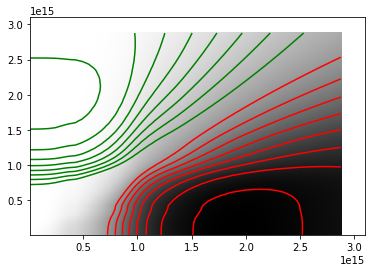

In [ ]:
# plot the interpolated Mb and Md functions

plt.pcolormesh(x_grid,y_grid,outdat,cmap='gray_r') # show Mb(rhoc,rhocdm) as a color map (darker = larger Mb)
#plt.pcolormesh(x_grid,y_grid,outdat,cmap='gray_r') # show Md(rhoc,rhocdm) as a color map (darker = larger Mb) -- but can't seem to show two colormaps at once

num_cs = 11
cs = plt.contour(x_grid,y_grid,outdat,list(np.linspace(1.,3.,num_cs)),colors='r') # plot the contours of constant Mb(rhoc,rhocdm)
cs_dm = plt.contour(x_grid,y_grid,outdat_dm,list(np.linspace(1.,3.,num_cs)),colors='g') # plot the contours of constant Md(rhoc,rhocdm)


In [ ]:
# extract the (rhoc,rhocdm) coordinates of the constant-fdm contours

contours = []
for i in range(num_cs+3):
  try: c = cs.allsegs[i][0] # if a contour was plotted, save it
  except: continue
  contours += [c] # list that stores all the extracted contours


In [ ]:
# downsample the contours to get a list of (rhoc,rhocdm) coordinates to use to generate a constant-fdm sequence of stars

num_stars = 100 # how many stars to aim for in the sequence
rhocs, rhocdms = [], []

for c in contours:
  
  skip = int(len(c[:,0])/num_stars)
  rhocs += [c[::skip,0]]
  rhocdms += [c[::skip,1]] # downselect to num_stars (rhoc,rhocdm) points


rhomin = 2.8e14 # because some central densities are too small to give physical neutron stars, throw out those below rhomin
rhomax = 12*rhomin # because some central densities are too large to give physical neutron stars, throw out those above rhomax
rhocs_out, rhocdms_out = [], []

for c,cdm in zip(rhocs,rhocdms):
  c_out, cdm_out = [], []

  for rhoc,rhocdm in zip(c,cdm):
    
    if (rhoc >= rhomin or rhocdm >= rhomin) and rhoc <= rhomax and rhocdm <=rhomax: # one of rhoc/rhocdm below rhomin is ok, to allow pure regular matter or pure dm star
      c_out += [rhoc]
      cdm_out += [rhocdm]
  rhocs_out += [c_out]
  rhocdms_out += [cdm_out]

In [ ]:
find_rhos(0)

('2877297297297297.5,2849459459459459.5,2822799717454841.5,2796876876876877.0,2769215248343442.5,2744087733988394.5,2716456456456456.5,2691018199582073.5,2663873873873874.0,2638048673904282.0,2611291291291291.5,2585980756844900.0,2558708708708709.0,2533963963963964.0,2507054261896364.0,2481381381381381.5,2456568614430765.0,2429485122591270.5,2404054054054054.0,2379269676872736.5,2352872009464809.0,2326726726726727.0,2301981981981982.0,2277237237237237.5,2251098919293863.5,2226003201555607.0,2199909909909910.0,2175165165165165.2,2150420420420420.2,2125675675675675.8,2100930930930931.0,2076186186186186.2,2051441441441441.5,2026696696696696.8,2001951951951952.0,1977207207207207.5,1952611016611840.8,1928524099442224.5,1904715196187334.8,1881321321321321.5,1856576576576577.0,1831831831831832.0,1809056656417647.0,1785323686770165.8,1760690690690690.8,1737390055748856.8,1714294294294294.5,1690337905692063.5,1667531906640940.5,1643153153153153.2,1621501501501501.5,1596845231824721.0,1575105105

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_mb0 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.8772972973e+15 g/cm^3
Done at central density 7.25034737966e+14 g/cm^3
Save to /content/macro_contour_mb0hqc18.csv


In [ ]:
find_rhos(1)

('2877297297297297.5,2852552552552553.0,2827807807807807.5,2803063063063063.0,2779001179743986.0,2754947558321904.0,2731052213532490.5,2706983863097642.0,2682432432432432.5,2657687687687688.0,2632942942942943.0,2608714578745659.5,2585624715166233.5,2561801801801802.0,2537057057057057.0,2512312312312312.5,2489753765111009.5,2465915915915916.0,2441171171171171.5,2417725139511407.0,2394774774774775.0,2370030030030030.0,2347264101776016.0,2323633633633634.0,2300289201964106.5,2277237237237237.5,2252730828329616.5,2230840840840841.0,2206423281012957.0,2184444444444444.5,2160298621128555.5,2138048048048048.2,2115174751056260.0,2091651651651651.8,2070000000000000.0,2046468538778374.8,2023603603603603.8,2001814660197846.2,1978849895189052.0,1955555555555555.8,1933903903903904.0,1912252252252252.2,1889783802100783.0,1866300831120507.5,1844204204204204.2,1822552552552552.5,1800900900900901.0,1779249249249249.5,1757597597597597.8,1735945945945946.0,1714294294294294.5,1692642642642643.0,1670990990

In [ ]:
len(find_rhos.newrhocs_list)

2009

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_mb1 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.8772972973e+15 g/cm^3
Done at central density 7.96483377624e+14 g/cm^3
Save to /content/macro_contour_mb1hqc18.csv


In [ ]:
find_rhos(2)

('2877297297297297.5,2852552552552552.5,2827807807807808.0,2803934121908614.5,2781221851838347.5,2756666666666667.0,2731921921921922.0,2707930453293414.0,2685525525525525.5,2660780780780781.0,2636500408511822.5,2614384384384384.5,2589639639639640.0,2565895573712092.5,2543243243243243.5,2518498498498499.0,2496812462867367.5,2472102102102102.0,2449763291648402.5,2425705705705706.0,2403538021286860.0,2379309309309309.5,2357657657657658.0,2332912912912913.0,2311261261261261.5,2287756653035925.5,2264864864864865.0,2243213213213213.2,2219352810508784.8,2196816816816817.0,2175165165165165.2,2152160307829623.8,2128814523775223.0,2107117117117117.0,2085465465465465.5,2063486383567211.8,2040836116167104.0,2017417417417417.5,1995765765765766.0,1974114114114114.5,1952462462462462.5,1930810810810811.0,1909159159159159.2,1887507507507507.5,1865976467278975.2,1845318655270523.0,1825367573066433.0,1803993993993994.0,1782342342342342.5,1762099588699946.5,1742132132132132.5,1720480480480480.5,1699420669

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_mb2 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.8772972973e+15 g/cm^3
Done at central density 8.60737768399e+14 g/cm^3
Save to /content/macro_contour_mb2hqc18.csv


In [ ]:
find_rhos(3)

('2877297297297297.5,2855645645645646.0,2830900900900901.0,2806268927781198.5,2784504504504504.5,2759759759759760.0,2737775579741942.5,2713363363363363.5,2689632156857835.0,2666966966966967.0,2643501081376060.0,2620570570570570.5,2597275830714193.0,2574174174174174.5,2552398243985925.0,2527777777777778.0,2506126126126126.5,2483045569411000.0,2459729729729730.0,2438078078078078.0,2416419336704548.5,2391681681681682.0,2370030030030030.0,2348378378378378.5,2326203776797880.0,2303392710488123.0,2280330330330330.5,2258678678678679.0,2237027027027027.0,2215375375375375.5,2193723723723723.8,2172072072072072.2,2150420420420420.5,2128768768768769.0,2107117117117117.2,2085465465465465.5,2064427243409185.2,2044710302865734.8,2023603603603603.8,2001951951951952.0,1980495910432570.2,1960717003890072.8,1940090090090090.2,1918438438438438.5,1898335662459864.0,1878228228228228.2,1856576576576576.8,1834924924924925.0,1816366366366366.5,1794714714714714.8,1773063063063063.2,1751411411411411.5,1729924678

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_mb3 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.8772972973e+15 g/cm^3
Done at central density 9.2383278867e+14 g/cm^3
Save to /content/macro_contour_mb3hqc18.csv


In [ ]:
find_rhos(4)

('2877297297297297.5,2855645645645646.0,2830900900900900.5,2809249249249249.5,2784504504504504.5,2762852852852853.0,2738108108108108.5,2716456456456456.5,2693233558823853.0,2670060060060060.0,2648408408408408.5,2625265168689957.0,2602012012012012.0,2580360360360360.5,2558708708708709.0,2537057057057057.0,2514301139094643.5,2491242575507537.0,2469009009009009.0,2447357357357357.5,2426074070610002.5,2405738502510404.5,2383648735304397.0,2363843843843844.0,2342192192192192.5,2320540540540540.5,2298888888888889.0,2277237237237237.5,2256551864784368.5,2237027027027027.5,2215375375375375.5,2193723723723723.8,2173209382890207.5,2153513513513513.8,2131861861861862.0,2110210210210210.5,2089165290286230.5,2070000000000000.0,2048348348348348.5,2026696696696696.5,2005045045045045.5,1984985967124418.0,1964834834834835.0,1943183183183183.5,1922326054016528.0,1901376349189365.5,1880412289386612.0,1859669669669669.8,1838018018018018.0,1816366366366366.5,1795834375091458.5,1774266250931976.5,1753252779

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_mb4 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.8772972973e+15 g/cm^3
Done at central density 9.92478079018e+14 g/cm^3
Save to /content/macro_contour_mb4hqc18.csv


In [ ]:
find_rhos(5)

('2877297297297297.5,2852552552552553.0,2830900900900901.0,2806250831900771.0,2784504504504504.5,2760439145373115.0,2738108108108108.5,2716456456456456.5,2691890798418041.0,2670060060060060.0,2648408408408409.0,2626756756756757.0,2602012012012012.0,2580360360360360.5,2558708708708709.0,2537057057057057.0,2515405405405405.5,2493753753753754.0,2472102102102102.0,2450450450450450.5,2428798798798799.0,2407147147147147.5,2385495495495495.5,2363843843843844.0,2342192192192192.5,2320540540540540.5,2298888888888889.0,2277237237237237.5,2255585585585586.0,2233933933933934.0,2212282282282282.5,2193132006817378.8,2172072072072072.0,2150420420420420.5,2128768768768769.0,2107117117117117.2,2085465465465465.5,2066452965323029.0,2045255255255255.0,2023603603603604.0,2001951951951952.0,1982215463070591.5,1961138523968320.8,1940090090090090.5,1918438438438438.5,1896958121081642.5,1878228228228228.2,1856576576576576.5,1836304562039494.8,1816366366366366.5,1795325157952092.5,1776156156156156.2,1754504504

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_mb5 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.8772972973e+15 g/cm^3
Done at central density 1.08021021021e+15 g/cm^3
Save to /content/macro_contour_mb5hqc18.csv


In [ ]:
find_rhos(6)

('2877297297297298.0,2855645645645646.0,2830900900900901.0,2808657765243291.5,2784504504504504.5,2759759759759760.0,2735015015015015.0,2710270270270270.5,2685525525525525.5,2660780780780781.0,2639129129129129.5,2614384384384384.5,2589639639639640.0,2567987987987988.0,2543243243243243.5,2521591591591591.5,2496846846846847.0,2475195195195195.5,2453543543543543.5,2431891891891892.0,2410240240240240.5,2385495495495495.5,2363843843843844.0,2342192192192192.5,2320540540540540.5,2298888888888889.0,2277237237237237.5,2255585585585586.0,2233933933933934.2,2212282282282282.5,2191120831662237.5,2172072072072072.2,2150420420420420.5,2128768768768769.0,2110210210210210.2,2088558558558558.8,2067674116581909.0,2048348348348348.5,2029789789789790.0,2008138138138138.2,1989579579579579.8,1968023967768677.5,1949369369369369.2,1930810810810811.0,1910838863818074.0,1890600600600600.5,1872042042042042.2,1853483483483483.5,1834924924924925.0,1818883857951059.0,1800900900900901.0,1782342342342342.5,1763783783

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_mb6 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.8772972973e+15 g/cm^3
Done at central density 1.21789107147e+15 g/cm^3
Save to /content/macro_contour_mb6hqc18.csv


In [ ]:
find_rhos(7)

('2522256458485642.5,2522275692417311.0,2522297524777542.5,2522281780296980.5,2522244329785384.0,2522223819074477.0,2522019396203515.0,2521729351967132.5,2521480742621661.0,2520535963846107.0,2519461802325362.5,2518498498498498.5,2516285639758670.5,2514018140927981.5,2511740955535562.0,2509089022243732.5,2506126126126126.5,2503033033033033.0,2500372149107193.5,2498595739616215.0,2496819330125236.5,2493753753753754.0,2487567567567567.5,2482092737653769.0,2476113640240462.5,2469009009009009.0,2460945818852744.5,2452688971005984.5,2444032227685829.5,2434984984984984.5,2422835211456510.0,2412892613301574.0,2400960960960961.0,2388588588588588.0,2375215436308525.5,2361180647464433.0,2348378378378378.5,2332912912912913.0,2317447447447447.5,2301981981981982.0,2283963633882698.5,2267957957957958.0,2249399399399399.5,2230840840840841.0,2212282282282282.5,2193723723723723.8,2172072072072072.5,2151423997501018.0,2131861861861862.0,2113303303303303.5,2091651651651651.8,2070000000000000.0,2051441441

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_mb7 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 2.52225645849e+15 g/cm^3
Done at central density 1.51216867245e+15 g/cm^3
Save to /content/macro_contour_mb7hqc18.csv


In [ ]:
data_con_mb0 = np.genfromtxt('/content/macro_contour_mb0hqc18.csv',delimiter=',',names=True,dtype=None)
data_con_mb1 = np.genfromtxt('/content/macro_contour_mb1hqc18.csv',delimiter=',',names=True,dtype=None)
data_con_mb2 = np.genfromtxt('/content/macro_contour_mb2hqc18.csv',delimiter=',',names=True,dtype=None)
data_con_mb3 = np.genfromtxt('/content/macro_contour_mb3hqc18.csv',delimiter=',',names=True,dtype=None)
data_con_mb4 = np.genfromtxt('/content/macro_contour_mb4hqc18.csv',delimiter=',',names=True,dtype=None)
data_con_mb5 = np.genfromtxt('/content/macro_contour_mb5hqc18.csv',delimiter=',',names=True,dtype=None)
data_con_mb6 = np.genfromtxt('/content/macro_contour_mb6hqc18.csv',delimiter=',',names=True,dtype=None)
data_con_mb7 = np.genfromtxt('/content/macro_contour_mb7hqc18.csv',delimiter=',',names=True,dtype=None)


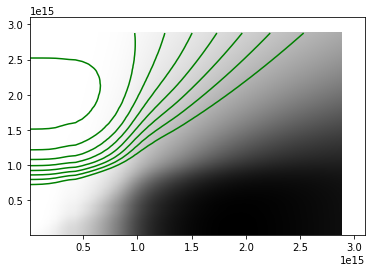

In [ ]:
# plot the interpolated Mb and Md functions

plt.pcolormesh(x_grid,y_grid,outdat,cmap='gray_r') # show Mb(rhoc,rhocdm) as a color map (darker = larger Mb)
#plt.pcolormesh(x_grid,y_grid,outdat,cmap='gray_r') # show Md(rhoc,rhocdm) as a color map (darker = larger Mb) -- but can't seem to show two colormaps at once

num_cs = 11
# cs = plt.contour(x_grid,y_grid,outdat,list(np.linspace(1.,3.,num_cs)),colors='r') # plot the contours of constant Mb(rhoc,rhocdm)
cs_dm = plt.contour(x_grid,y_grid,outdat_dm,list(np.linspace(1.,3.,num_cs)),colors='g') # plot the contours of constant Md(rhoc,rhocdm)


In [ ]:
contours_dm = []
for i in range(num_cs+1):
  try: c = cs_dm.allsegs[i][0] # if a contour was plotted, save it
  except: continue
  contours_dm += [c] # list that stores all the extracted contours


In [ ]:
# downsample the contours to get a list of (rhoc,rhocdm) coordinates to use to generate a constant-fdm sequence of stars

num_stars = 100 # how many stars to aim for in the sequence
rhocs, rhocdms = [], []

for c in contours_dm:
  
  skip = int(len(c[:,0])/num_stars)
  rhocs += [c[::skip,0]]
  rhocdms += [c[::skip,1]] # downselect to num_stars (rhoc,rhocdm) points


rhomin = 2.8e14 # because some central densities are too small to give physical neutron stars, throw out those below rhomin
rhomax = 12*rhomin # because some central densities are too large to give physical neutron stars, throw out those above rhomax
rhocs_out, rhocdms_out = [], []

for c,cdm in zip(rhocs,rhocdms):
  c_out, cdm_out = [], []

  for rhoc,rhocdm in zip(c,cdm):
    
    if (rhoc >= rhomin or rhocdm >= rhomin) and rhoc <= rhomax and rhocdm <=rhomax: # one of rhoc/rhocdm below rhomin is ok, to allow pure regular matter or pure dm star
      c_out += [rhoc]
      cdm_out += [rhocdm]
  rhocs_out += [c_out]
  rhocdms_out += [cdm_out]

In [ ]:
find_rhos(0)

('10000000000000.0,53303303303303.305,97167955853694.61,139909909909909.9,180120120120120.12,219398235512958.44,255745821219782.12,291471471471471.5,325495495495495.5,362612612612612.6,400807608826147.6,439939939939939.94,473963963963964.0,504894894894894.9,537382423183725.7,569730752468182.5,600780780780780.9,631711711711711.8,662642642642642.6,691934395481904.1,721411411411411.5,752342342342342.5,780180180180180.1,808018018018018.0,834347975624642.8,860600600600600.6,885345345345345.4,910090090090090.1,933831291353611.9,956486486486486.5,978138138138138.2,1001671675598128.0,1023612613010136.5,1046186186186186.2,1067837837837838.0,1089917126011014.0,1114234234234234.1,1137585825947575.0,1160181668518710.0,1183296167622459.5,1207027027027027.0,1231771771771771.8,1256516516516516.5,1281261261261261.2,1306006006006006.0,1330750750750750.8,1355495495495495.5,1380240240240240.2,1403060696505960.5,1426636636636636.8,1450942479270551.2,1473033033033033.0,1497777777777777.8,1519429429429429.5

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_md0 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 1e+13 g/cm^3
Done at central density 2.51770957149e+15 g/cm^3
Save to /content/macro_contour_md0hqc18.csv


In [ ]:
find_rhos(1)

('10000000000000.0,50210210210210.21,90420420420420.42,127537537537537.55,164654654654654.66,198678678678678.7,232702702702702.72,266448777535904.34,297657657657657.7,328588588588588.6,362612612612612.6,396636636636636.7,430660660660660.7,461591591591591.6,491707311043011.9,520254881327116.3,548198198198198.25,576036036036036.1,603268279626106.1,628618618618618.6,656456456456456.5,681246369111791.6,707371458029121.5,731629315691544.5,755435435435435.5,780180180180180.2,801831831831831.9,823483483483483.5,844432080607683.5,863693693693693.8,882669364926854.0,901805687983189.5,919695246197013.1,937927927927928.0,956088360745929.8,971951951951952.0,989972799882256.9,1006231202010975.6,1024106976804345.8,1040000000000000.0,1058558558558558.6,1076781903691124.0,1093252348552807.5,1111141141141141.2,1130423673225758.5,1149815686840854.0,1168509697416454.5,1188468468468468.5,1207027027027027.0,1225821502704146.2,1246829641043452.5,1265795795795795.8,1284586522331357.5,1305301724352863.5,13245

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_md1 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 1e+13 g/cm^3
Done at central density 2.21228228228e+15 g/cm^3
Save to /content/macro_contour_md1hqc18.csv


In [ ]:
find_rhos(2)

('10000000000000.002,47117117117117.125,84234234234234.23,121351351351351.38,155375375375375.38,189399399399399.4,220330330330330.34,251261261261261.3,282192192192192.25,313123123123123.1,344054054054054.06,374984984984984.94,409009009009009.0,439939939939939.94,467777777777777.8,495253718836932.1,520360360360360.4,548198198198198.25,572942942942943.0,597687687687687.8,622432432432432.5,646565422672723.5,668828828828828.8,692777947245042.0,715225225225225.2,735836972456434.1,755435435435435.5,776841414725902.2,795645645645645.8,813449856834681.0,830546428743201.8,848228228228228.2,863693693693693.8,879640056736966.0,894624624624624.6,910090090090090.1,925555555555555.6,939349171964046.2,953393393393393.5,968031051599598.5,981303871466954.0,996696696696696.8,1012162162162162.2,1026284244950155.0,1040222691592573.5,1055598690864892.8,1070930930930931.0,1086396396396396.5,1101861861861861.8,1117327327327327.4,1133204637171118.5,1148722507206082.2,1164366288013316.5,1181905734418615.5,1197

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_md2 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 1e+13 g/cm^3
Done at central density 1.96692685187e+15 g/cm^3
Save to /content/macro_contour_md2hqc18.csv


In [ ]:
find_rhos(3)

('10000000000000.0,44024024024024.03,78048048048048.06,108978978978978.98,143003003003003.0,173933933933933.94,204864864864864.88,235608831365009.6,263633633633633.66,291471471471471.5,319309309309309.25,347147147147147.2,378078078078078.1,408906145882170.0,436846846846846.9,461606291229979.25,488065592829006.75,511081081081081.1,535825825825825.9,558757498732808.9,582222222222222.2,603873873873873.9,625525525525525.5,645716105831906.8,665735735735735.8,686192724277291.9,703894821820418.5,721536330112668.8,739969969969970.0,758299329793216.1,773993993993994.0,789459459459459.5,804924924924925.0,819840126231792.5,832986362380882.9,848228228228228.2,860600600600600.6,873573865492316.6,886651977727642.2,899593633812308.2,912469405360156.2,925364487757102.5,937927927927928.0,950276224521854.2,962550145650734.1,974214601765509.4,986432296911669.0,999126671355583.2,1010736738517751.5,1023008821331961.2,1035011234867126.0,1047124952375445.5,1060200055304404.8,1072834533940743.5,10851401738861

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_md3 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 1e+13 g/cm^3
Done at central density 1.73285285285e+15 g/cm^3
Save to /content/macro_contour_md3hqc18.csv


In [ ]:
find_rhos(4)

('10000000000000.0,40930930930930.94,71861861861861.88,99699699699699.7,130630630630630.64,158468468468468.47,189399399399399.4,214144144144144.16,241981981981982.0,266726726726726.75,294564564564564.56,319309309309309.3,344054054054054.06,371891891891891.94,399729729729729.75,427567567567567.56,449219219219219.25,470870870870870.9,494491673196772.9,514311160321161.8,535825825825825.9,557477477477477.5,576036036036036.1,594594594594594.6,613153153153153.2,629706710729130.9,647177177177177.2,665735735735735.8,681201201201201.2,696621068197143.9,712132132132132.1,727597597597597.6,740599354317074.5,754415067284353.1,767807807807807.9,780180180180180.2,794707864742669.1,806820111910692.8,818023748563691.8,829669669669669.8,842042042042042.1,854414414414414.5,865435031201828.5,876066066066066.1,887820027408057.1,897717717717717.8,909219370017678.2,919369369369369.5,929282908549668.0,939716226919889.8,949694820364354.4,959312432127865.5,968858858858858.9,978805770591010.8,988590373269523.1,

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_md4 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 1e+13 g/cm^3
Done at central density 1.50230609108e+15 g/cm^3
Save to /content/macro_contour_md4hqc18.csv


In [ ]:
find_rhos(5)

('10000000000000.0,34744744744744.746,62582582582582.586,90420420420420.42,118258258258258.25,143003003003003.0,170840840840840.84,195585585585585.6,220330330330330.38,245075075075075.06,266726726726726.75,288595728622046.8,310663590858055.4,333102308894288.0,356426426426426.44,378078078078078.1,402822822822822.9,427567567567567.56,446651979744281.44,467777777777777.8,486336336336336.4,504894894894894.9,520896014788481.7,538918918918918.9,554384384384384.44,569849849849849.9,587370848203581.9,602012282786303.2,616246246246246.2,630339465237354.2,644084084084084.1,659549549549549.6,671921921921922.0,684294294294294.4,696666666666666.8,709552085430536.4,721411411411411.5,734722109025647.0,746156156156156.2,758299918889868.4,768816838229073.8,780180180180180.2,791839782763110.2,801831831831831.8,811111111111111.2,820699471347396.6,830586225309025.8,840378549458251.5,850170873607477.0,859609651765307.0,867630699160460.8,876066066066066.1,884840903935873.8,891686734972198.1,900810810810810.

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_md5 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 1e+13 g/cm^3
Done at central density 1.25142889822e+15 g/cm^3
Save to /content/macro_contour_md5hqc18.csv


In [ ]:
find_rhos(6)

('10000000000000.0,34744744744744.742,59489489489489.484,84234234234234.23,105885885885885.89,130630630630630.64,155375375375375.38,177027027027027.03,198678678678678.7,220330330330330.3,238888888888888.9,257674448809414.53,276006006006006.03,294891003605644.3,315846606411157.75,334774774774774.8,353333333333333.4,371891891891891.94,393543543543543.56,415195195195195.2,433753753753753.75,449219219219219.25,464684684684684.7,480150150150150.1,495615615615615.6,509749489099966.06,523453453453453.5,538918918918918.94,551291291291291.3,564325325562868.5,577532124446847.5,590738923330826.0,602468357615341.5,615351471991328.1,626009039716008.0,637897897897897.9,649966702004430.9,659944649311143.0,671921921921922.0,681201201201201.2,691048455558097.8,700870435051454.8,709615763412428.8,720746607185350.5,730690690690690.8,739969969969970.0,748180752216975.8,755858413334716.1,764714714714714.8,772714929069092.8,780356372870489.6,789459459459459.5,796770051953185.8,803647534818719.2,810468434184

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_md6 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 1e+13 g/cm^3
Done at central density 9.75099550029e+14 g/cm^3
Save to /content/macro_contour_md6hqc18.csv


In [ ]:
find_rhos(7)

('10000000000000.0,31651651651651.656,53303303303303.31,74954954954954.97,93513513513513.52,115165165165165.17,136816816816816.83,155375375375375.38,176247498228924.88,194252800026275.88,211051051051051.06,229609609609609.62,248168168168168.2,261404019264280.7,276006006006006.0,291471471471471.5,306936936936936.94,322402402402402.44,337676807469094.06,353312798379949.06,368798798798798.8,384264264264264.3,402822822822822.94,418288288288288.3,433753753753753.75,444380868511151.1,455405405405405.44,467777777777777.8,480150150150150.25,492522522522522.56,501801801801801.8,511081081081081.1,520360360360360.4,529639639639639.7,538836263071740.06,547418183847862.75,554718030607757.1,562204681390383.25,569849849849849.9,576563618965534.8,582620736257163.5,590897476305134.8,597687687687687.8,604515481351017.5,610540934874076.1,616246246246246.2,621599927495116.1,626420780398236.1,630823608492718.8,634804804804804.9,638217805772022.4,640990990990991.0,644324307093032.4,648893664000646.5,6514887

In [ ]:
# calculate neutron star observables for a given equation of state

%%bash -s '$find_rhos.newrhocs_list' '$find_rhos.newrhocdms_list'
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops hqc18.csv -p R,M,Rdm,Mdm,Mb,Md -d /content/ns-struc-dm/ -o /content/ -v -t macro_contour_md7 -r $1 -n 4 -R $2 # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] 
#-d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of hqc18 stars
Start at central density 1e+13 g/cm^3
Done at central density 2.23723723724e+13 g/cm^3
Save to /content/macro_contour_md7hqc18.csv


In [ ]:
data_con_md0 = np.genfromtxt('/content/macro_contour_md0hqc18.csv',delimiter=',',names=True,dtype=None)
data_con_md1 = np.genfromtxt('/content/macro_contour_md1hqc18.csv',delimiter=',',names=True,dtype=None)
data_con_md2 = np.genfromtxt('/content/macro_contour_md2hqc18.csv',delimiter=',',names=True,dtype=None)
data_con_md3 = np.genfromtxt('/content/macro_contour_md3hqc18.csv',delimiter=',',names=True,dtype=None)
data_con_md4 = np.genfromtxt('/content/macro_contour_md4hqc18.csv',delimiter=',',names=True,dtype=None)
data_con_md5 = np.genfromtxt('/content/macro_contour_md5hqc18.csv',delimiter=',',names=True,dtype=None)
data_con_md6 = np.genfromtxt('/content/macro_contour_md6hqc18.csv',delimiter=',',names=True,dtype=None)
data_con_md7 = np.genfromtxt('/content/macro_contour_md7hqc18.csv',delimiter=',',names=True,dtype=None)


In [ ]:
def find_max(file):
  l = np.argmax((file['Mg']))
  R, M, rho_c, rho_cdm = file['R'][l], file['Mg'][l], file['rhoc'][l], file['rhocdm'][l]
  return R,M, rho_c, rho_cdm

In [ ]:
stable_md = []


In [ ]:
stable_md.append(find_max(data_con_md0))
stable_md.append(find_max(data_con_md1))
stable_md.append(find_max(data_con_md2))
stable_md.append(find_max(data_con_md3))
stable_md.append(find_max(data_con_md4))
stable_md.append(find_max(data_con_md5))
stable_md.append(find_max(data_con_md6))
stable_md.append(find_max(data_con_md7))


In [ ]:
stable_mb = []


In [ ]:
stable_mb.append(find_max(data_con_mb0))
stable_mb.append(find_max(data_con_mb2))
stable_mb.append(find_max(data_con_mb3))
stable_mb.append(find_max(data_con_mb4))
stable_mb.append(find_max(data_con_mb5))
stable_mb.append(find_max(data_con_mb6))
stable_mb.append(find_max(data_con_mb7))


In [ ]:
stable = stable_mb + stable_md


In [ ]:
stable_sort = np.sort(stable, axis = 0)

In [ ]:
xdata = np.array([x[0] for x in stable])
ydata = np.array([x[1] for x in stable])
x,y = zip(*sorted(zip(xdata,ydata),key=lambda xdata: xdata[0]))



# stable_line = np.polyfit(x,y,8)
x1,y1 = np.array(list(x)), np.array(list(y))
x2,y2 = x1.tolist(), y1.tolist()
xnew = np.linspace(0,20, 60, endpoint = True)
xnew2 =np.linspace(4.4,10.3, 60, endpoint = True)

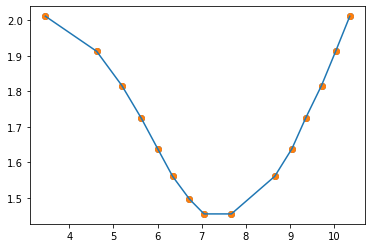

In [ ]:

f = interp1d(x2, y2, kind='linear', bounds_error = False, fill_value = 2.5)

plt.scatter(x2,y2)
plt.plot(x2,f(x2))
plt.scatter([ x[0] for x in stable], [ x[1] for x in stable])

In [ ]:
def func(x, a, b,c,d,e):
    return a*np.power(x,4) + b*np.power(x,3) + c*np.power(x,2) + d*x + e
popt, pcov = curve_fit(func, x1, y1)
func(x1, *popt)

def func_new(x, a,b,c,d,e):

  return np.piecewise(x, [x < min(x1), (x>= min(x1)) & (x< 1.1*max(x1)), x >= 1.1*max(x1)], [2.5,lambda x: func(x,a,b,c,d,e), 2.5])

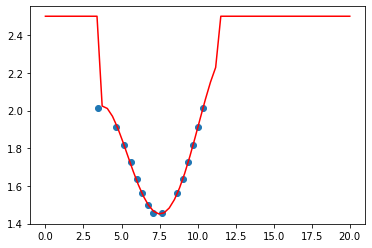

In [ ]:
plt.scatter([ x[0] for x in stable], [ x[1] for x in stable])
plt.plot(xnew, func_new(xnew, *popt), 'r-')

In [ ]:
def stable_crop(file,col,frac, a,b,c,d,e):
  boolean_array = file['Mg'] < f(file['R'])
  # print(boolean_array)
  boolean_new = []
  boolean_element = boolean_array[0]
  # print(boolean_array)
  i=0
  while boolean_element == True and i<len(boolean_array):
    boolean_element = boolean_array[i]
    boolean_new.append(boolean_element)
    i=i+1
  while i < len(boolean_array):
    boolean_new.append(False)
    i = i+1
  boolean_array = boolean_new
  # print(boolean_array)

  for i in range(len(boolean_array)):

    if boolean_array[i] == True:
      R,M = file['R'][i], file['Mg'][i]
      # print(R,M)
      plt.scatter(file['R'][i], file['Mg'][i],marker='.',s=3, c = col,label = '{}%'.format(frac) if i == 0 else "" )

    elif boolean_array[i] == False:
      R,M = file['R'][i], file['Mg'][i]
      # print(R, M, func(file['R'][i],a,b,c,d,e))
      

    # if file['M'] < func(file['R'], a,b,c,d,e):
    #   plt.scatter(file['R'], file['Mg'],marker='.',s=3, c = 'b' )
    # else:
    #   plt.scatter(file['R'], file['Mg'],marker='.',s=3, c = 'r' )
  

  return


In [ ]:
data_con = [data_con0,data_con1,data_con2, data_con3,data_con4, data_con5, data_con6, data_con7, data_con8,data_con9,data_con10]
data_frac = [1,10,20,30,40,50,60,70,80,90,99 ]
data_colours = ['b','g','r','c','m','y','indigo','pink','lime','brown','orange']

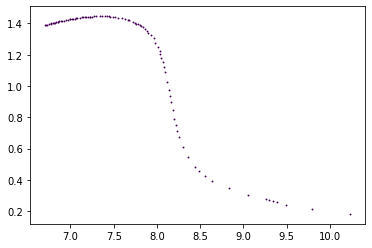

In [ ]:
stable_crop(data_con5, 40,'b',*popt)

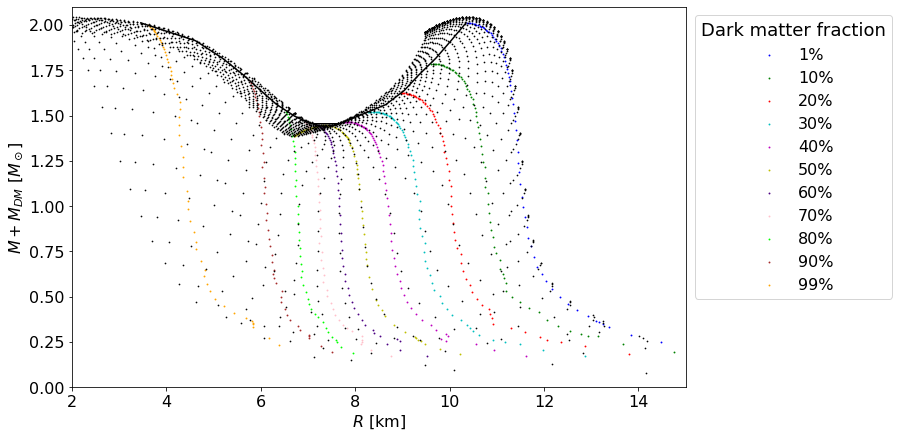

In [ ]:
plt.figure(figsize= (11,7))
for i,j,k in zip(data_con,data_frac,data_colours):
  stable_crop(i,k,j,*popt)
# stable_crop(data_con5,*popt)

plt.xlabel(r'$R$ [km]', size = 16) # add plot labels, etc.
plt.ylabel(r'$M+M_{DM}$ [$M_\odot$]', size = 16)
# plt.plot(xnew2, func(xnew2, *popt), 'k-',label = 'Stability curve')
plt.plot(x2,f(x2), 'k-')
# plt.scatter(mrl_data_hqc18['R'][0::48],(mrl_data_hqc18['Mg'])[0::48], label = '{} R0'.format('hqc18'), marker = 'o', color = 'k', s = 10)
plt.scatter(dat['R'],dat['Mg'],marker='.',s=2,c='k')


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(bbox_to_anchor=(1.35, 1), fontsize = 16, title='Dark matter fraction',title_fontsize=18 )
plt.xlim(2,15)
plt.ylim(0,2.1)
plt.show()


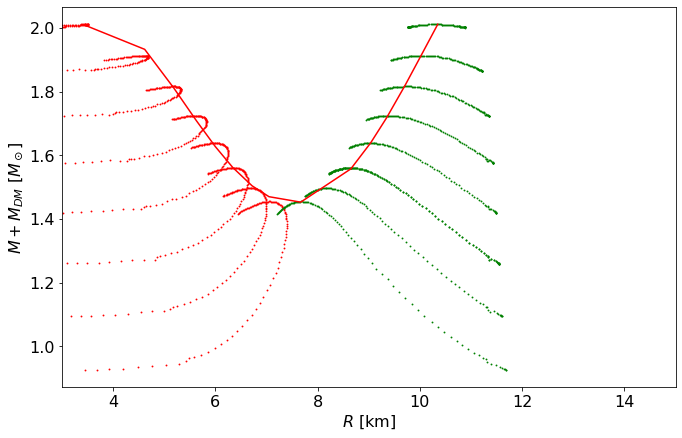

In [ ]:
# plot the surviving M-R data
plt.figure(figsize= (11,7))
# filter_fdm(dat,'sly',48)
# plt.scatter(dat['R'],dat['Mg'],marker='.',s=3,c='k')

plt.scatter(data_con_md0['R'],data_con_md0['Mg'],marker='.',s=3,c='r', label = '1%')
plt.scatter(data_con_md1['R'],data_con_md1['Mg'],marker='.',s=3, label = '1.2',c='r')
plt.scatter(data_con_md2['R'],data_con_md2['Mg'],marker='.',s=3, label = '1.4',c='r')
plt.scatter(data_con_md3['R'],data_con_md3['Mg'],marker='.',s=3, label = '1.6',c='r')
plt.scatter(data_con_md4['R'],data_con_md4['Mg'],marker='.',s=3, label = '1.8',c='r')
plt.scatter(data_con_md5['R'],data_con_md5['Mg'],marker='.',s=3, label = '2.0',c='r')
plt.scatter(data_con_md6['R'],data_con_md6['Mg'],marker='.',s=3, label = '2.2',c='r')
plt.scatter(data_con_md7['R'],data_con_md7['Mg'],marker='.',s=3, label = '2.4',c='r')



plt.scatter(data_con_mb0['R'],data_con_mb0['Mg'],marker='.',s=3, label = '1',c='g')
plt.scatter(data_con_mb2['R'],data_con_mb2['Mg'],marker='.',s=3, label = '1.4',c='g')
plt.scatter(data_con_mb1['R'],data_con_mb1['Mg'],marker='.',s=3, label = '1.2',c='g')
plt.scatter(data_con_mb2['R'],data_con_mb2['Mg'],marker='.',s=3, label = '1.4',c='g')
plt.scatter(data_con_mb3['R'],data_con_mb3['Mg'],marker='.',s=3, label = '1.6',c='g')
plt.scatter(data_con_mb4['R'],data_con_mb4['Mg'],marker='.',s=3, label = '1.8',c='g')
plt.scatter(data_con_mb5['R'],data_con_mb5['Mg'],marker='.',s=3, label = '2.0',c='g')
plt.scatter(data_con_mb6['R'],data_con_mb6['Mg'],marker='.',s=3, label = '2.2',c='g')
plt.scatter(data_con_mb7['R'],data_con_mb7['Mg'],marker='.',s=3, label = '2.4',c='g')

plt.plot(x1, func(x1, *popt), 'r-')

# plt.scatter(data_con0['R'],data_con0['Mg'],marker='.',s=3, label = '1%', c='b')
# plt.scatter(data_con1['R'],data_con1['Mg'],marker='.',s=3, label = '10%', c='b')
# plt.scatter(data_con2['R'],data_con2['Mg'],marker='.',s=3, label = '20%', c='b')
# plt.scatter(data_con3['R'],data_con3['Mg'],marker='.',s=3, label = '30%', c='b')
# plt.scatter(data_con4['R'],data_con4['Mg'],marker='.',s=3, label = '40%', c='b')
# plt.scatter(data_con5['R'],data_con5['Mg'],marker='.',s=3, label = '50%', c='b')
# plt.scatter(data_con6['R'],data_con6['Mg'],marker='.',s=3, label = '60%', c='b')
# plt.scatter(data_con7['R'],data_con7['Mg'],marker='.',s=3, label = '70%', c='b')
# plt.scatter(data_con8['R'],data_con8['Mg'],marker='.',s=3, label = '80%', c='b')
# plt.scatter(data_con9['R'],data_con9['Mg'],marker='.',s=3, label = '90%', c='b')
# plt.scatter(data_con10['R'],data_con10['Mg'],marker='.',s=3, label = '99%', c='b')

plt.xlabel(r'$R$ [km]', size = 16) # add plot labels, etc.
plt.ylabel(r'$M+M_{DM}$ [$M_\odot$]', size = 16)
# plt.legend(bbox_to_anchor=(1, 1),fontsize = 16, title='baryon mass',title_fontsize=18 )
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(3,15)
plt.show()






In [ ]:
# 